In [25]:
# read in some height and weight data for both genders from Kaggle
import pandas as pd
weight_height=pd.read_csv('weight-height.csv')

In [26]:
weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [27]:
# recode Gender as a numerical flag which is 1 if female, 0 if male
weight_height['Female']=weight_height['Gender'].apply(lambda x: 1 if x=="Female" else 0)


In [28]:
weight_height.head()

,Gender,Height,Weight,Female
0,Male,73.847017,241.893563,0
1,Male,68.781904,162.310473,0
2,Male,74.110105,212.740856,0
3,Male,71.730978,220.042470,0
4,Male,69.881796,206.349801,0


In [29]:
weight_height.tail()

,Gender,Height,Weight,Female
9995,Female,66.172652,136.777454,1
9996,Female,67.067155,170.867906,1
9997,Female,63.867992,128.475319,1
9998,Female,69.034243,163.852461,1
9999,Female,61.944246,113.649103,1


In [30]:
weight_height.describe()

,Height,Weight,Female
count,10000.000000,10000.000000,10000.000000
mean,66.367560,161.440357,0.500000
std,3.847528,32.108439,0.500025
min,54.263133,64.700127,0.000000
25%,63.505620,135.818051,0.000000
50%,66.318070,161.212928,0.500000
75%,69.174262,187.169525,1.000000
max,78.998742,269.989699,1.000000


### Covariance

Covariance measures the extent to which two variables vary together. E is the expected value, which is the population mean. Intuitively, if each variable is on the same side of its mean at the same time as the other, they have a positive covariance, if they are are different sides, they have a negative covariance, and if they are unrelated, they have a covariance of zero or close to zero.

![covariance formula](covariance.svg "Covariance Formula")

### Correlation

The magnitude of the covariance is hard to interpret and depends on the magnitudes of the variables in question. So in practice, people tend to use a normalized version of the covariance, which is the correlation coefficient. It has the same sign as the covariance, but ranges between -1 and +1. It is the covariance divided by the product of the standard deviations of the two variables.

![correlation formula](correlation.png "Correlation Formula")

In [47]:
corr=weight_height.corr()
corr

,Height,Weight,Female
Height,1.000000,0.924756,-0.691072
Weight,0.924756,1.000000,-0.796723
Female,-0.691072,-0.796723,1.000000


<AxesSubplot:>

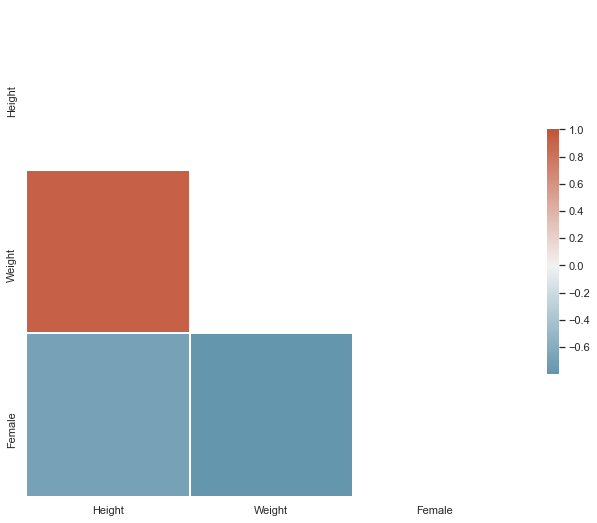

In [48]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

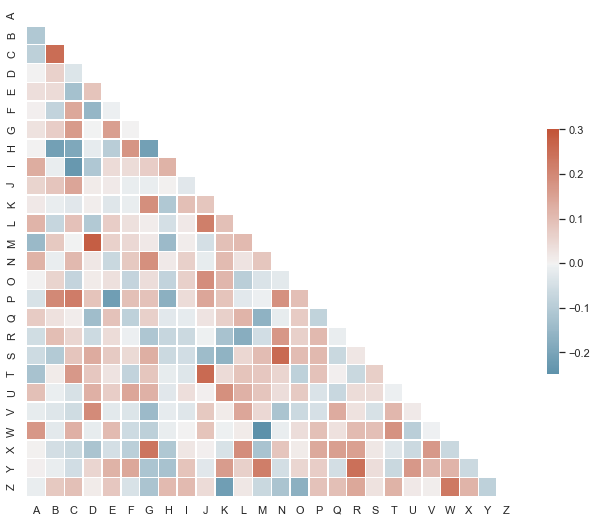

In [49]:
# from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
from string import ascii_letters
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [50]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

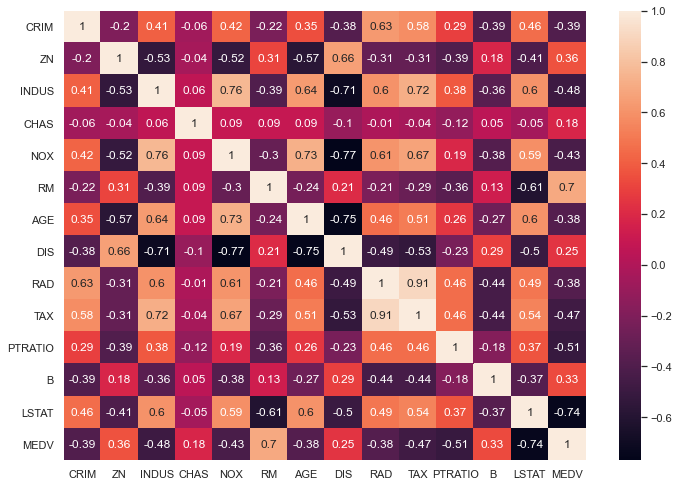

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate 
- PTRATIO: Pupil-teacher ratio by town
- B: A measure of how many African Americans are in the town; lower values mean more
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes